In [5]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
#some testing for working of numpy arrays, please ignore

a1 = np.array([0, 1, 2, 3])
b1 = np.array([4, 5, 6])
print(a1)
print(b1)
cells = np.array([a1, b1], dtype = object)
#print(cells)
#print(cells[1][2])
#print(type(cells[1]))

cells1 = np.array([[1, 2, 3], [4, 5, 6]])
#print(cells1)
#print(cells1[:,2])

cells2 = np.empty(2, dtype = object)
print(cells2)
cells2[0] = a1
print(cells2)

[0 1 2 3]
[4 5 6]
[None None]
[array([0, 1, 2, 3]) None]


In [44]:
a1 = np.array([[3, 2, 4, 8, 0, 9], [2, 1, 8, 2, 1, 7]])
print(a1)
a2 = np.array([2, 3, 7, 1])
#a11 = a1[:, np.newaxis]
#print(a11)
#print(a11+a2)
#print(np.greater_equal(a11, a2))
#print(a11[np.greater_equal(a11, a2)])
a11 = np.dstack([a1]*4)
print(a11)
#print(a11[:, :, :])
print(np.greater_equal(a11[0, :, :], a2))
#print(a11[np.greater_equal(a11[0, :, :], a2)])

[[3 2 4 8 0 9]
 [2 1 8 2 1 7]]
[[[3 3 3 3]
  [2 2 2 2]
  [4 4 4 4]
  [8 8 8 8]
  [0 0 0 0]
  [9 9 9 9]]

 [[2 2 2 2]
  [1 1 1 1]
  [8 8 8 8]
  [2 2 2 2]
  [1 1 1 1]
  [7 7 7 7]]]
[[ True  True False  True]
 [ True False False  True]
 [ True  True False  True]
 [ True  True  True  True]
 [False False False False]
 [ True  True  True  True]]


In [23]:
# Stacking function which takes spectrum data and parameters of peaks (start, centre and end) 
# and outputs stacked peak (but is not normalising)

def nonNormalisedLinearStacker(fdata1, peakParam1):
    
    P1 = peakParam1.shape[0]
    
    #plotting spectrum
    
    ffig1, faxs1 = plt.subplots(3, 2, figsize=(12,15))
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    faxs1[0, 0].plot(fdata1[:, 0], fdata1[:, 1], label = 'Spectrum')
    
    faxs1[0, 0].set_title('Full spectrum')
    faxs1[0, 0].set(xlabel = 'Wavelength in Å', ylabel = 'Relative intensity')
    faxs1[0, 0].legend()
    
    
    #extracting wavelengths and intensities within ranges given in peakParam1
    
    fpeakdata1 = np.empty(shape = P1, dtype = object)
    
    for i1 in range(P1):
        #iterative statement
        fpeakdata1[i1] = fdata1[np.logical_and(fdata1[:, 0]>=peakParam1[i1, 0], fdata1[:, 0]<=peakParam1[i1, 2]), :]
        pkLbl = 'Just peak ' + str(i1+1)
        faxs1[0, 1].plot(fpeakdata1[i1][:, 0], fpeakdata1[i1][:, 1], label = pkLbl)
    
    """
    fpeak1data = fdata[:, np.logical_and(fdata[0]>=peakmins[0], fdata[0]<=peakmaxs[0])]
    fpeak2data = fdata[:, np.logical_and(fdata[0]>=peakmins[1], fdata[0]<=peakmaxs[1])]
    fpeak3data = fdata[:, np.logical_and(fdata[0]>=peakmins[2], fdata[0]<=peakmaxs[2])]
    fpeak4data = fdata[:, np.logical_and(fdata[0]>=peakmins[3], fdata[0]<=peakmaxs[3])]
    fpeak5data = fdata[:, np.logical_and(fdata[0]>=peakmins[4], fdata[0]<=peakmaxs[4])]
    
    faxs[0, 1].plot(fpeak1data[0], fpeak1data[1], label = 'Just peak 1')
    faxs[0, 1].plot(fpeak2data[0], fpeak2data[1], label = 'Just peak 2')
    faxs[0, 1].plot(fpeak3data[0], fpeak3data[1], label = 'Just peak 3')
    faxs[0, 1].plot(fpeak4data[0], fpeak4data[1], label = 'Just peak 4')
    faxs[0, 1].plot(fpeak5data[0], fpeak5data[1], label = 'Just peak 5')
    """
    
    faxs1[0, 1].set_title('Spectrum with just peaks')
    faxs1[0, 1].set(xlabel = 'Wavelength in Å', ylabel = 'Relative intensity')
    faxs1[0, 1].legend()
    
    #shifting the above peaks by central value
    
    fpdshifted1 = fpeakdata1
    
    for j1 in range(P1):
        fpdshifted1[j1][:, 0] = fpeakdata1[j1][:, 0] - peakParam1[j1, 1]
        fpdshifted1[j1][:, 1] = fpeakdata1[j1][:, 1]
        shPkLbl = 'Shifted peak ' + str(j1+1)
        faxs1[1, 0].plot(fpdshifted1[j1][:, 0], fpdshifted1[j1][:, 1], label = shPkLbl)

    """
    fp1dshifted = np.zeros(fpeak1data.shape)
    fp1dshifted[0] = fpeak1data[0] - peakcens[0]
    fp1dshifted[1] = fpeak1data[1]
    faxs[1, 0].plot(fp1dshifted[0], fp1dshifted[1], label='Shifted peak 1')

    fp2dshifted = np.zeros(fpeak2data.shape)
    fp2dshifted[0] = fpeak2data[0] - peakcens[1]
    fp2dshifted[1] = fpeak2data[1]
    faxs[1, 0].plot(fp2dshifted[0], fp2dshifted[1], label='Shifted peak 2')

    fp3dshifted = np.zeros(fpeak3data.shape)
    fp3dshifted[0] = fpeak3data[0] - peakcens[2]
    fp3dshifted[1] = fpeak3data[1]
    faxs[1, 0].plot(fp3dshifted[0], fp3dshifted[1], label='Shifted peak 3')

    fp4dshifted = np.zeros(fpeak4data.shape)
    fp4dshifted[0] = fpeak4data[0] - peakcens[3]
    fp4dshifted[1] = fpeak4data[1]
    faxs[1, 0].plot(fp4dshifted[0], fp4dshifted[1], label='Shifted peak 4')

    fp5dshifted = np.zeros(fpeak5data.shape)
    fp5dshifted[0] = fpeak5data[0] - peakcens[4]
    fp5dshifted[1] = fpeak5data[1]
    faxs[1, 0].plot(fp5dshifted[0], fp5dshifted[1], label='Shifted peak 5')
    """
    
    faxs1[1, 0].set_title('Spectrum with peaks shifted')
    faxs1[1, 0].set(xlabel = 'Relative Wavelength (shifted by peak) in Å', ylabel = 'Relative intensity')
    faxs1[1, 0].legend()
    
    #calculating no of points, wavelength ranges and corresponding equally distributed wavelengths
    
    fnosPoints1 = fpdshifted1[0].shape[0]
    minWave1 = peakParam1[0][0]-peakParam1[0][1]
    maxWave1 = peakParam1[0][2]-peakParam1[0][1]
    
    for k1 in range(P1):
        if fpdshifted1[k1].shape[0] > fnosPoints1:
            fnosPoints1 = fpdshifted1[k1].shape[0]
        if peakParam1[k1][0]-peakParam1[k1][1] > minWave1:
            minWave1 = peakParam1[k1][0]-peakParam1[k1][1]
        if peakParam1[k1][2]-peakParam1[k1][1] < maxWave1:
            maxWave1 = peakParam1[k1][2]-peakParam1[k1][1]
            
    #print(fnosPoints1)
    #print(minWave1)
    #print(maxWave1)
    
    fwavelengths1 = np.linspace(minWave1, maxWave1, num = fnosPoints1)
    
    """
    fnosPoints = max(fp1dshifted.shape[1], fp2dshifted.shape[1], fp3dshifted.shape[1], fp4dshifted.shape[1], fp5dshifted.shape[1])
    fwavelengths = np.linspace(minWave, maxWave, num=fnosPoints)
    """
    
    
    #interpolation
    
    ffa1 = np.empty(shape = P1, dtype = object)
    
    for l1 in range(P1):
        ffa1[l1] = interp1d(fpdshifted1[l1][:, 0], fpdshifted1[l1][:, 1])
    
    """
    ff1 = interp1d(fp1dshifted[0],fp1dshifted[1])
    ff2 = interp1d(fp2dshifted[0],fp2dshifted[1])
    ff3 = interp1d(fp3dshifted[0],fp3dshifted[1])
    ff4 = interp1d(fp4dshifted[0],fp4dshifted[1])
    ff5 = interp1d(fp5dshifted[0],fp5dshifted[1])
    """
    
    
    #plotting interpolated peaks and stacked peak
    
    ffinalData1 = np.zeros((fnosPoints1, 2))
    ffinalData1[:, 0] = fwavelengths1
    
    for m1 in range(P1):
        tmpHol1 = ffa1[m1](fwavelengths1)
        ffinalData1[:, 1] = ffinalData1[:, 1] + (tmpHol1/float(P1))
        lab1 = 'Interpolated peak ' + str(m1+1)
        faxs1[1, 1].plot(fwavelengths1, tmpHol1, label = lab1)
    
    faxs1[1, 1].plot(ffinalData1[:, 0], ffinalData1[:, 1], label = 'Stacked peak')
    
    faxs1[1, 1].set_title('Spectrum with peaks interpolated in calculated range and stacked peak')
    faxs1[1, 1].set(xlabel = 'Relative Wavelength (shifted by peak) in Å', ylabel = 'Relative intensity')
    faxs1[1, 1].legend()
    
    """
    fp1dfin = np.zeros((2, fnosPoints))
    fp1dfin[0] = fwavelengths
    fp1dfin[1] = ff1(fwavelengths)
    faxs[1, 1].plot(fp1dfin[0], fp1dfin[1], label = 'Interpolated peak 1')

    fp2dfin = np.zeros((2, fnosPoints))
    fp2dfin[0] = fwavelengths
    fp2dfin[1] = ff2(fwavelengths)
    faxs[1, 1].plot(fp2dfin[0], fp2dfin[1], label = 'Interpolated peak 2')

    fp3dfin = np.zeros((2, fnosPoints))
    fp3dfin[0] = fwavelengths
    fp3dfin[1] = ff3(fwavelengths)
    faxs[1, 1].plot(fp3dfin[0], fp3dfin[1], label = 'Interpolated peak 3')

    fp4dfin = np.zeros((2, fnosPoints))
    fp4dfin[0] = fwavelengths
    fp4dfin[1] = ff4(fwavelengths)
    faxs[1, 1].plot(fp4dfin[0], fp4dfin[1], label = 'interpolated peak 4')

    fp5dfin = np.zeros((2, fnosPoints))
    fp5dfin[0] = fwavelengths
    fp5dfin[1] = ff5(fwavelengths)
    faxs[1, 1].plot(fp5dfin[0], fp5dfin[1], label = 'interpolated peak 5')
    

    ffinalData = np.zeros((2, fnosPoints))
    ffinalData[0] = fwavelengths
    ffinalData[1] = (fp1dfin[1]+fp2dfin[1]+fp3dfin[1]+fp4dfin[1]+fp5dfin[1])/5.0
    faxs[1, 1].plot(ffinalData[0], ffinalData[1], label = 'Stacked peak')
    
    faxs[1, 1].set_title('Spectrum with peaks interpolated in calculated range and stacked peak')
    faxs[1, 1].set(xlabel = 'Relative Wavelength (shifted by peak) in Å', ylabel = 'Relative intensity')
    faxs[1, 1].legend()
    """
    
    faxs1[2, 0].plot(ffinalData1[:, 0], ffinalData1[:, 1], label = 'Just stacked peak')
    
    faxs1[2, 0].set_title('Just stacked peak')
    faxs1[2, 0].set(xlabel = 'Relative Wavelength (shifted by peak) in Å', ylabel = 'Relative intensity')
    faxs1[2, 0].legend()
    
    ffig1.delaxes(faxs1[2, 1])
    
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    
    fullTitle = 'Plots for stacking'
    plt.suptitle(fullTitle, size = 18)

In [6]:
#loading the pentacene lab data and simulated spectrum

data5000 = np.loadtxt('Pentacene_air_snr5000.txt')
data2000 = np.loadtxt('Pentacene_air_snr2000.txt')
data1000 = np.loadtxt('Pentacene_air_snr1000.txt')
data500 = np.loadtxt('Pentacene_air_snr500.txt')
data100 = np.loadtxt('Pentacene_air_snr100.txt')

In [24]:
#putting the just found peak values and ranges
#I took minimas of peak as central value here

#%matplotlib inline

peakParam = np.zeros((5,3))

peakParam[0, 0] = 5264.222303
peakParam[0, 2] = 5270.360895
peakParam[0, 1] = 5267.600206

peakParam[1, 0] = 5287.032308
peakParam[1, 2] = 5290.810678
peakParam[1, 1] = 5288.886049

peakParam[2, 0] = 5303.716283
peakParam[2, 2] = 5308.335695
peakParam[2, 1] = 5305.721707

peakParam[3, 0] = 5335.136806
peakParam[3, 2] = 5342.695359
peakParam[3, 1] = 5337.921532

peakParam[4, 0] = 5358.495471
peakParam[4, 2] = 5365.142247
peakParam[4, 1] = 5361.090278

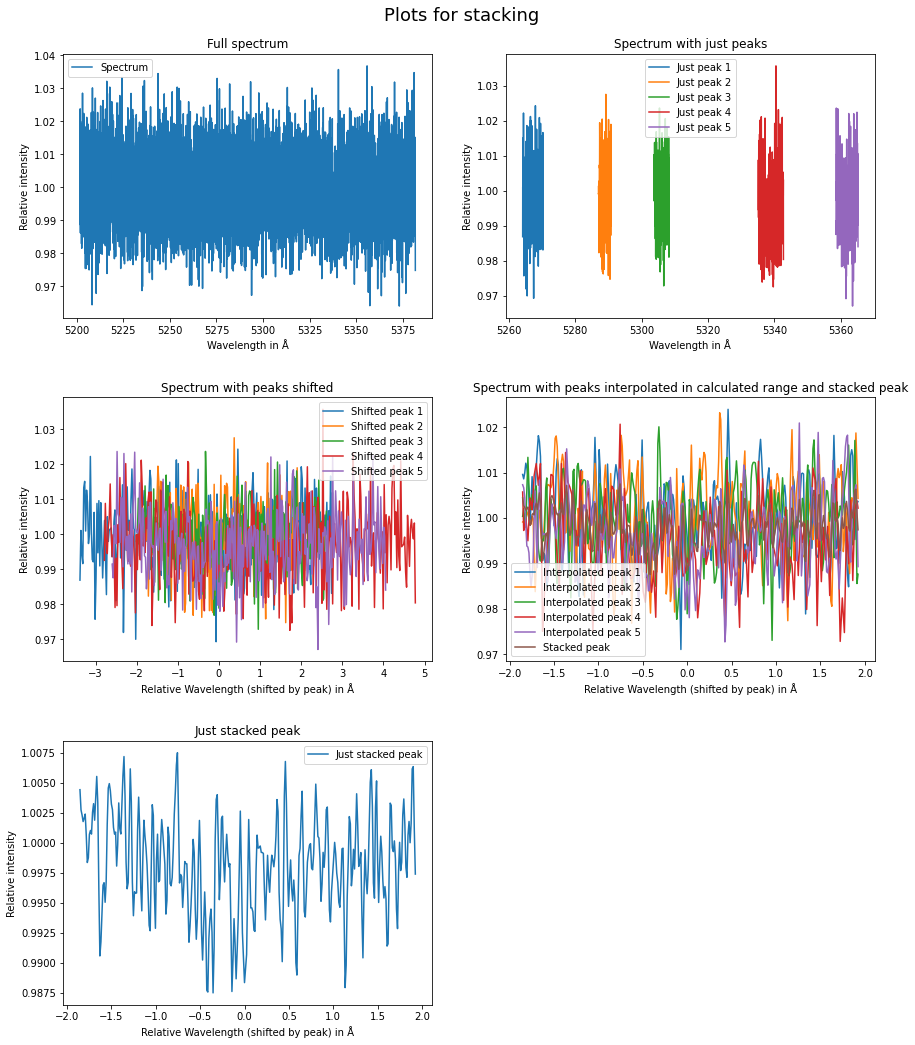

In [25]:
nonNormalisedLinearStacker(data100, peakParam)

In [27]:
# Stacking function which takes spectrum data and parameters of peaks (centre and fwhm) 
# and outputs stacked peak (but is not normalising)

def widthNormLinStacker(fdata2, peakParam2):
    
    P2 = peakParam2.shape[0]
    
    
    #plotting spectrum
    
    ffig2, faxs2 = plt.subplots(3, 2, figsize=(12,15))
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    faxs2[0, 0].plot(fdata2[:, 0], fdata2[:, 1], label = 'Spectrum')
    
    faxs2[0, 0].set_title('Full spectrum')
    faxs2[0, 0].set(xlabel = 'Wavelength in Å', ylabel = 'Relative intensity')
    faxs2[0, 0].legend()
    
    
    #extracting wavelengths and intensities within ranges given by peakParam2
    
    fpeakdata2 = np.empty(shape = P2, dtype = object)
    
    for i2 in range(P2):
        #fpeakdata2[i2] = fdata2[np.logical_and(fdata2[:, 0]>=peakParam2[i2, 0], fdata1[:, 0]<=peakParam2[i2, 2]), :]
        #total width of peak is being taken to be 4*FWHM
        
        fpeakdata2[i2] = fdata2[np.logical_and(fdata2[:, 0]>=peakParam2[i2, 0]-2*peakParam2[i2, 1], fdata2[:, 0]<=peakParam2[i2, 0]+2*peakParam2[i2, 1]), :]
        pkLbl2 = 'Just peak ' + str(i2+1)
        faxs2[0, 1].plot(fpeakdata2[i2][:, 0], fpeakdata2[i2][:, 1], label = pkLbl2)
    
    faxs2[0, 1].set_title('Spectrum with just peaks')
    faxs2[0, 1].set(xlabel = 'Wavelength in Å', ylabel = 'Relative intensity')
    faxs2[0, 1].legend()
    
    
    #shifting the above peaks by central value and dividing by FWHM/2
    
    fpdshifted2 = fpeakdata2
    
    for j2 in range(P2):
        fpdshifted2[j2][:, 0] = (fpeakdata2[j2][:, 0] - peakParam2[j2, 0])/(peakParam2[j2, 1]/2)
        fpdshifted2[j2][:, 1] = fpeakdata2[j2][:, 1]
        shPkLbl2 = 'Shifted peak ' + str(j2+1)
        faxs2[1, 0].plot(fpdshifted2[j2][:, 0], fpdshifted2[j2][:, 1], label = shPkLbl2)
    
    faxs2[1, 0].set_title('Spectrum with peaks shifted')
    faxs2[1, 0].set(xlabel = 'Relative Wavelength (shifted by peak) in Å', ylabel = 'Relative intensity')
    faxs2[1, 0].legend()
    
    
    #calculating no of points, wavelength ranges and corresponding equally distributed wavelengths
    
    fnosPoints2 = fpdshifted2[0].shape[0]
    #minWave2 = peakParam2[0][0]-peakParam2[0][1]
    #maxWave2 = peakParam2[0][2]-peakParam2[0][1]
    minWave2 = np.min(fpdshifted2[0][:, 0])
    maxWave2 = np.max(fpdshifted2[0][:, 0])
    
    for k2 in range(P2):
        if fpdshifted2[k2].shape[0] > fnosPoints2:
            fnosPoints2 = fpdshifted2[k2].shape[0]
        if np.min(fpdshifted2[k2][:, 0]) > minWave2:
            minWave2 = np.min(fpdshifted2[k2][:, 0])
        if np.max(fpdshifted2[k2][:, 0]) < maxWave2:
            maxWave2 = np.max(fpdshifted2[k2][:, 0])
    
    fwavelengths2 = np.linspace(minWave2, maxWave2, num = fnosPoints2)
    
    
    #interpolation
    
    ffa2 = np.empty(shape = P2, dtype = object)
    
    for l2 in range(P2):
        ffa2[l2] = interp1d(fpdshifted2[l2][:, 0], fpdshifted2[l2][:, 1])
    
    
    #plotting interpolated peaks and stacked peak
    
    ffinalData2 = np.zeros((fnosPoints2, 2))
    ffinalData2[:, 0] = fwavelengths2
    
    for m2 in range(P2):
        tmpHol2 = ffa2[m2](fwavelengths2)
        ffinalData2[:, 1] = ffinalData2[:, 1] + (tmpHol2/float(P2))
        lab2 = 'Interpolated peak ' + str(m2+1)
        faxs2[1, 1].plot(fwavelengths2, tmpHol2, label = lab2)
    
    faxs2[1, 1].plot(ffinalData2[:, 0], ffinalData2[:, 1], label = 'Stacked peak')
    
    faxs2[1, 1].set_title('Spectrum with peaks interpolated in calculated range and stacked peak')
    faxs2[1, 1].set(xlabel = 'Relative Wavelength (shifted by peak) in Å', ylabel = 'Relative intensity')
    faxs2[1, 1].legend()
    
    faxs2[2, 0].plot(ffinalData2[:, 0], ffinalData2[:, 1], label = 'Just stacked peak')
    
    faxs2[2, 0].set_title('Just stacked peak')
    faxs2[2, 0].set(xlabel = 'Relative Wavelength (shifted by peak) in Å', ylabel = 'Relative intensity')
    faxs2[2, 0].legend()
    
    ffig2.delaxes(faxs2[2, 1])
    
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    
    fullTitle2 = 'Plots for stacking'
    plt.suptitle(fullTitle2, size = 18)

In [3]:
from peakBasedFunctions import voigtMultiPeakNG

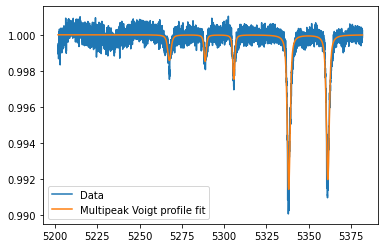

In [10]:
pParRaw = voigtMultiPeakNG(data5000, 5, 0.0002402523653397399)

In [13]:
pPar = np.zeros((5,2))
#print(pParRaw)

pPar[0, 0] = pParRaw['Centre1']
pPar[1, 0] = pParRaw['Centre2']
pPar[2, 0] = pParRaw['Centre3']
pPar[3, 0] = pParRaw['Centre4']
pPar[4, 0] = pParRaw['Centre5']

pPar[0, 1] = pParRaw['FWHM1']
pPar[1, 1] = pParRaw['FWHM2']
pPar[2, 1] = pParRaw['FWHM3']
pPar[3, 1] = pParRaw['FWHM4']
pPar[4, 1] = pParRaw['FWHM5']

print(pPar)

[[5.26757036e+03 2.38700472e+00]
 [5.28873339e+03 1.61913037e+00]
 [5.30567614e+03 1.47238968e+00]
 [5.33813794e+03 2.05428280e+00]
 [5.36126254e+03 2.08991862e+00]]


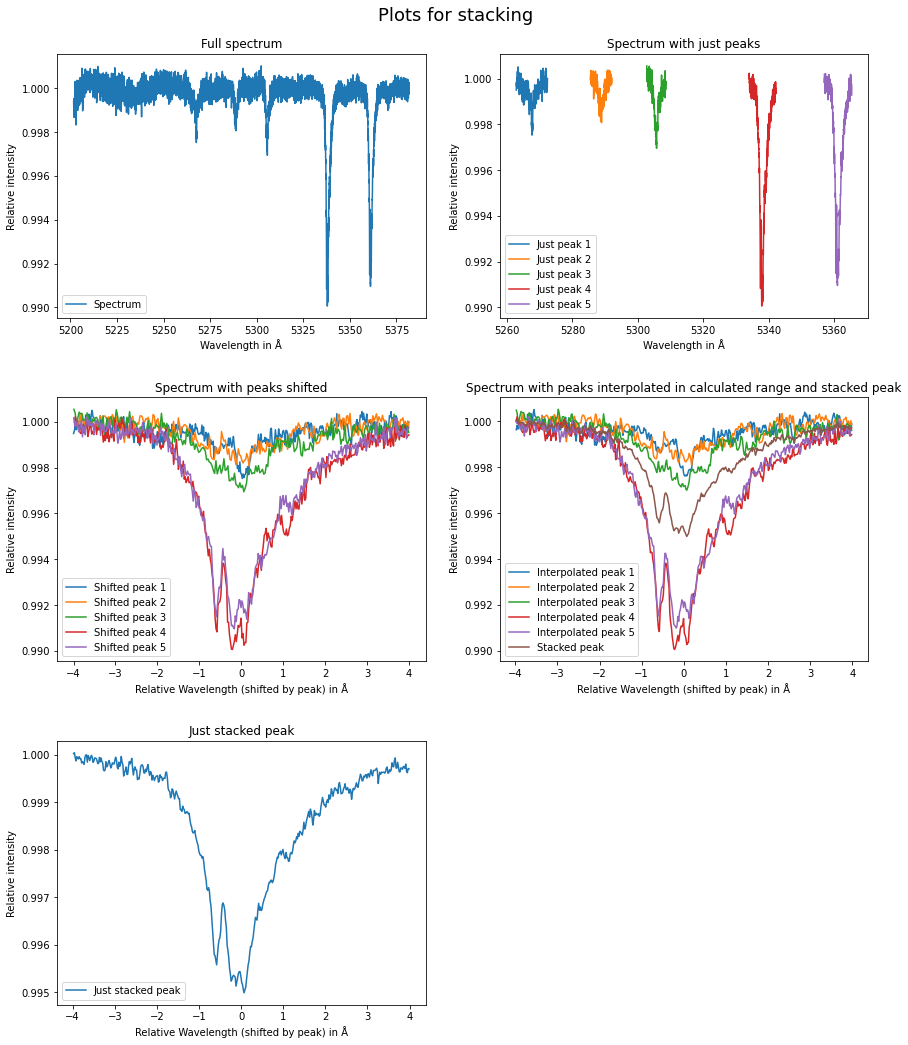

In [28]:
widthNormLinStacker(data5000, pPar)